In [44]:
!pip install mlxtend
!pip install imbalanced-learn
!pip install itables

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
import mlxtend
import sklearn
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [45]:
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/Colab Notebooks/Machine_learnig_Tahlildadeh"


from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

df = pd.read_csv(f'{data_path}/diabetes.csv')
df.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(768, 9)

In [46]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [47]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [48]:
df.shape

(768, 9)

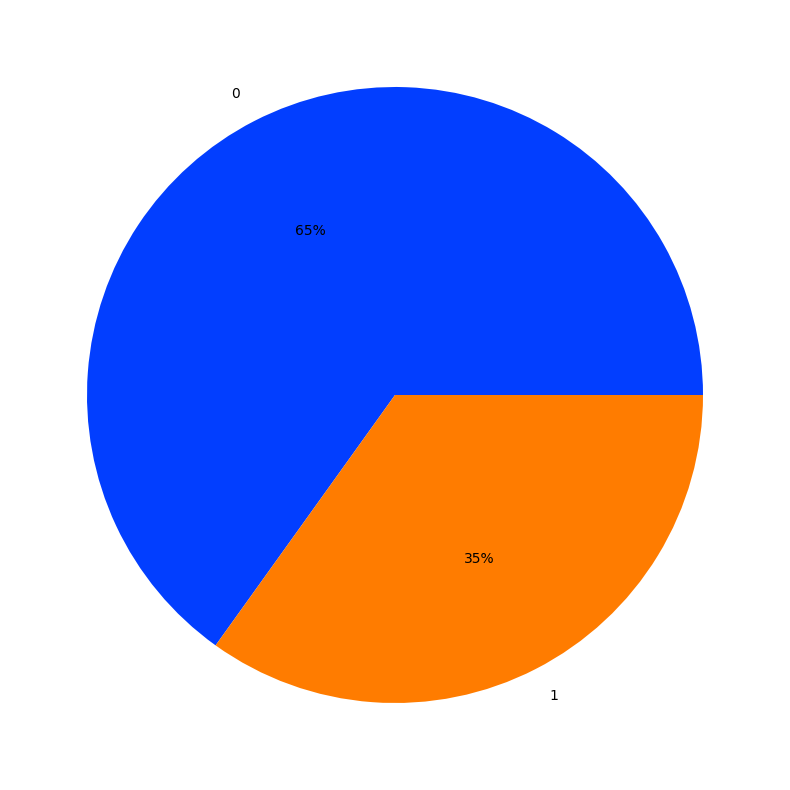

In [49]:
data = df['Outcome'].value_counts().values
keys = df['Outcome'].value_counts().index

plt.figure(figsize = (10,10))
palette_color = sns.color_palette('bright')
plt.pie(data, labels = keys, colors = palette_color, autopct= '%.0f%%')
plt.show()

In [50]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [51]:
x.shape, y.shape

((768, 8), (768,))

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()    # Z-score normalization
scaler.fit(x)
x = scaler.transform(x)

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [54]:
# Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(x_train,y_train)

# Desired size for each class after undersampling
desired_size_per_class = len(y_train) // 2

# Apply Random Undersampling to reduce the dataset size to the desired number of samples
undersample = RandomUnderSampler(sampling_strategy={0: desired_size_per_class, 1: desired_size_per_class}, random_state=42)
x_train_resampled, y_train_resampled = undersample.fit_resample(x_smote, y_smote)

# Check the size of the resampled dataset
print(f"Original train dataset size: {x_train.shape}")
print(f"Resampled train dataset size: {x_train_resampled.shape}")

Original train dataset size: (614, 8)
Resampled train dataset size: (614, 8)


In [55]:
y_train_resampled.shape, x_train_resampled.shape

((614,), (614, 8))

In [56]:
y_train_resampled.value_counts()

Outcome
0    307
1    307
Name: count, dtype: int64

In [57]:
y_test.value_counts()

Outcome
0    100
1     54
Name: count, dtype: int64

In [58]:
x_train = x_train_resampled
y_train = y_train_resampled

In [59]:
# Define evaluation metrics function
def clf_score(y_pred, y_true, data_segment):
    print(f'Scores for {data_segment} data')
    print('**********************************')
    scores = {
       'accuracy_score' : accuracy_score(y_true, y_pred),
       'recall_score': recall_score(y_true, y_pred),
       'precision_score': precision_score(y_true, y_pred),
       'f1_score': f1_score(y_true, y_pred)
    }
    return scores

In [60]:
lr = LogisticRegression(random_state=42, n_jobs=-1)
lr.fit(x_train, y_train)
y_pred_train_lr = lr.predict(x_train)
pprint(clf_score(y_pred_train_lr, y_train, 'Train'))

y_pred_test_lr = lr.predict(x_test)
pprint(clf_score(y_pred_test_lr, y_test, 'Test'))

Scores for Train data
**********************************
{'accuracy_score': 0.755700325732899,
 'f1_score': 0.75,
 'precision_score': 0.7679180887372014,
 'recall_score': 0.7328990228013029}
Scores for Test data
**********************************
{'accuracy_score': 0.7337662337662337,
 'f1_score': 0.6495726495726495,
 'precision_score': 0.6031746031746031,
 'recall_score': 0.7037037037037037}


In [61]:
ppn = Perceptron(random_state=42)
ppn.fit(x_train, y_train)
y_pred_train_ppn = ppn.predict(x_train)
pprint(clf_score(y_pred_train_ppn, y_train, 'Train'))

y_pred_test_ppn = ppn.predict(x_test)
pprint(clf_score(y_pred_test_ppn, y_test, 'Test'))

Scores for Train data
**********************************
{'accuracy_score': 0.7100977198697068,
 'f1_score': 0.7210031347962382,
 'precision_score': 0.6948640483383686,
 'recall_score': 0.749185667752443}
Scores for Test data
**********************************
{'accuracy_score': 0.6038961038961039,
 'f1_score': 0.5196850393700787,
 'precision_score': 0.4520547945205479,
 'recall_score': 0.6111111111111112}


In [62]:
dt = DecisionTreeClassifier( random_state = 42)
dt.fit(x_train,y_train)
y_pred_train_dt = dt.predict(x_train)
pprint(clf_score(y_pred_train_dt, y_train, 'Train'))

y_pred_test_dt = dt.predict(x_test)
pprint(clf_score(y_pred_test_dt, y_test, 'Test'))

Scores for Train data
**********************************
{'accuracy_score': 1.0,
 'f1_score': 1.0,
 'precision_score': 1.0,
 'recall_score': 1.0}
Scores for Test data
**********************************
{'accuracy_score': 0.7142857142857143,
 'f1_score': 0.6071428571428571,
 'precision_score': 0.5862068965517241,
 'recall_score': 0.6296296296296297}


Scores for Train data
**********************************
{'accuracy_score': 0.8403908794788274,
 'f1_score': 0.8454258675078864,
 'precision_score': 0.8195718654434251,
 'recall_score': 0.8729641693811075}
Scores for Test data
**********************************
{'accuracy_score': 0.7012987012987013,
 'f1_score': 0.640625,
 'precision_score': 0.5540540540540541,
 'recall_score': 0.7592592592592593}


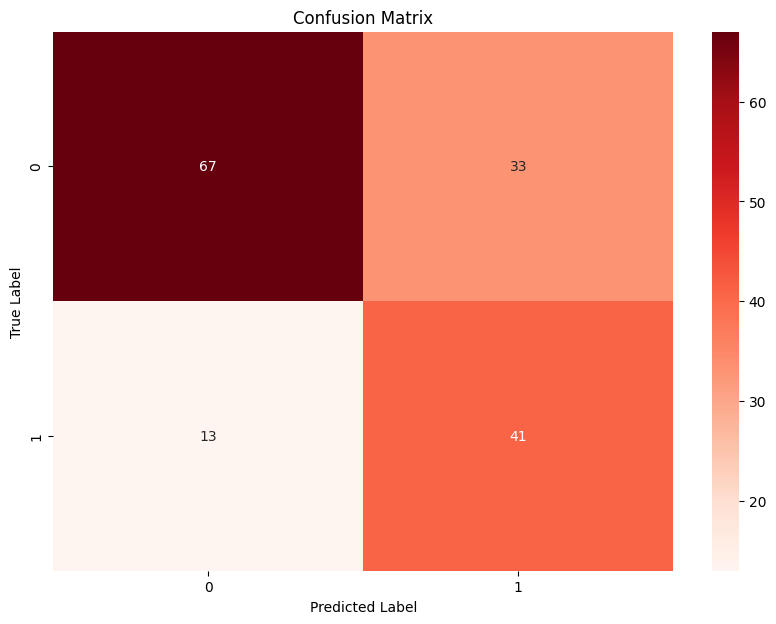

In [63]:
svm = SVC(kernel='rbf',random_state=42, probability=True)
svm.fit(x_train,y_train)
y_pred_train_svm = svm.predict(x_train)
pprint(clf_score(y_pred_train_svm, y_train, 'Train'))

y_pred_test_svm = svm.predict(x_test)
pprint(clf_score(y_pred_test_svm, y_test, 'Test'))

cm = confusion_matrix(y_test, y_pred_test_svm)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


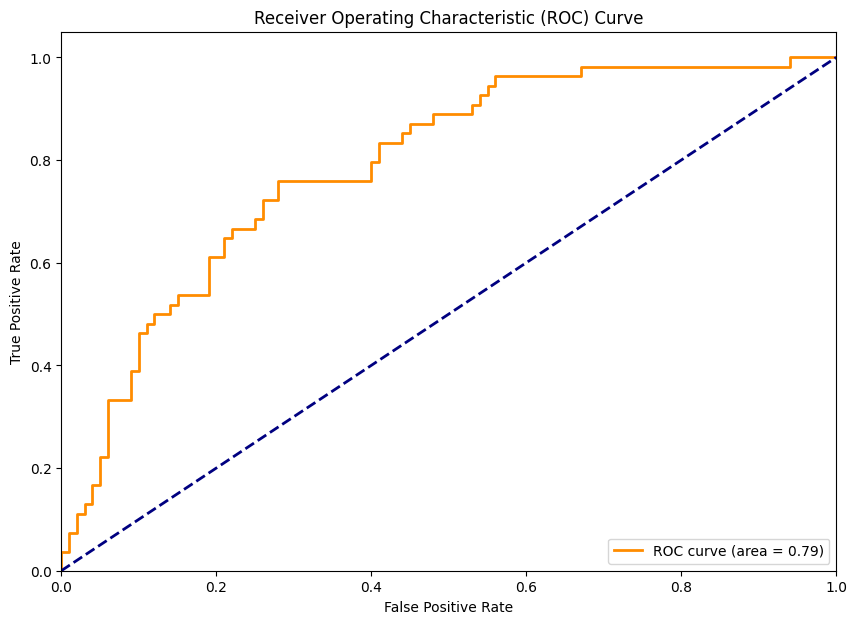

In [64]:
# Compute ROC curve and ROC AUC
y_pred_proba = svm.predict_proba(x_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [65]:
# Convert pandas Series to NumPy array
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [66]:
c_hp = [0.01, 0.1, 1.0, 10.0]    # pishfarz c = 1 va gamma = 0.1 in svm , rbf
gamma_hp = [0.01, 0.1, 1.0, 10.0]
plt.figure(figsize=(15,15))

counter = 1
for i, c in enumerate(c_hp):
    for j, gamma in enumerate(gamma_hp):
        svm = SVC(kernel='rbf', random_state=42, gamma = gamma, C = c)
        svm.fit(x_train,y_train)
        y_pred_test_svm = svm.predict(x_test)
        pprint(clf_score(y_pred_test_svm, y_test, 'Test'))
        print (f' C = {c}, gamma = {gamma}')




Scores for Test data
**********************************
{'accuracy_score': 0.7077922077922078,
 'f1_score': 0.6341463414634146,
 'precision_score': 0.5652173913043478,
 'recall_score': 0.7222222222222222}
 C = 0.01, gamma = 0.01
Scores for Test data
**********************************
{'accuracy_score': 0.6753246753246753,
 'f1_score': 0.6268656716417911,
 'precision_score': 0.525,
 'recall_score': 0.7777777777777778}
 C = 0.01, gamma = 0.1
Scores for Test data
**********************************
{'accuracy_score': 0.5064935064935064,
 'f1_score': 0.5730337078651685,
 'precision_score': 0.4112903225806452,
 'recall_score': 0.9444444444444444}
 C = 0.01, gamma = 1.0
Scores for Test data
**********************************
{'accuracy_score': 0.6493506493506493,
 'f1_score': 0.0,
 'precision_score': 0.0,
 'recall_score': 0.0}
 C = 0.01, gamma = 10.0
Scores for Test data
**********************************
{'accuracy_score': 0.7142857142857143,
 'f1_score': 0.6271186440677967,
 'precision_scor

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Scores for Test data
**********************************
{'accuracy_score': 0.6493506493506493,
 'f1_score': 0.0,
 'precision_score': 0.0,
 'recall_score': 0.0}
 C = 0.1, gamma = 10.0
Scores for Test data
**********************************
{'accuracy_score': 0.7467532467532467,
 'f1_score': 0.6666666666666666,
 'precision_score': 0.6190476190476191,
 'recall_score': 0.7222222222222222}
 C = 1.0, gamma = 0.01
Scores for Test data
**********************************
{'accuracy_score': 0.7077922077922078,
 'f1_score': 0.6456692913385828,
 'precision_score': 0.5616438356164384,
 'recall_score': 0.7592592592592593}
 C = 1.0, gamma = 0.1
Scores for Test data
**********************************
{'accuracy_score': 0.6948051948051948,
 'f1_score': 0.6050420168067226,
 'precision_score': 0.5538461538461539,
 'recall_score': 0.6666666666666666}
 C = 1.0, gamma = 1.0
Scores for Test data
**********************************
{'accuracy_score': 0.6428571428571429,
 'f1_score': 0.0,
 'precision_score': 0.

<Figure size 1500x1500 with 0 Axes>

In [67]:
results = {}

# Loop through each combination of C and gamma
for c in c_hp:
    for gamma in gamma_hp:
        # Create and train the SVM model
        svm = SVC(kernel='rbf', random_state=1, gamma=gamma, C=c)
        svm.fit(x_train, y_train)

        # Predict on the test set
        y_pred_test_svm = svm.predict(x_test)

        # Calculate accuracy
        param_dict = clf_score(y_test, y_pred_test_svm,'Test')
        accuracy = param_dict['accuracy_score']

        # Store accuracy in the dictionary with parameters as key
        results[(c, gamma)] = accuracy

        # Print the current accuracy for reference
        print(f'Accuracy: {accuracy:.4f} | C: {c}, Gamma: {gamma}')

# Find the minimum accuracy and corresponding parameters
max_accuracy = -float('inf')
max_params = None

for params, accuracy in results.items():
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        max_params = params

# Print the minimum accuracy and its parameters
print(f'\nMax accuracy: {max_accuracy:.4f}')
print(f'Parameters for minimum accuracy: C={max_params[0]}, Gamma={max_params[1]}')


Scores for Test data
**********************************
Accuracy: 0.7078 | C: 0.01, Gamma: 0.01
Scores for Test data
**********************************
Accuracy: 0.6753 | C: 0.01, Gamma: 0.1
Scores for Test data
**********************************
Accuracy: 0.5065 | C: 0.01, Gamma: 1.0
Scores for Test data
**********************************
Accuracy: 0.6494 | C: 0.01, Gamma: 10.0
Scores for Test data
**********************************
Accuracy: 0.7143 | C: 0.1, Gamma: 0.01
Scores for Test data
**********************************
Accuracy: 0.6688 | C: 0.1, Gamma: 0.1
Scores for Test data
**********************************
Accuracy: 0.5065 | C: 0.1, Gamma: 1.0
Scores for Test data
**********************************
Accuracy: 0.6494 | C: 0.1, Gamma: 10.0
Scores for Test data
**********************************
Accuracy: 0.7468 | C: 1.0, Gamma: 0.01
Scores for Test data
**********************************
Accuracy: 0.7078 | C: 1.0, Gamma: 0.1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Scores for Test data
**********************************
Accuracy: 0.6948 | C: 1.0, Gamma: 1.0
Scores for Test data
**********************************
Accuracy: 0.6429 | C: 1.0, Gamma: 10.0
Scores for Test data
**********************************
Accuracy: 0.7338 | C: 10.0, Gamma: 0.01
Scores for Test data
**********************************
Accuracy: 0.7013 | C: 10.0, Gamma: 0.1
Scores for Test data
**********************************
Accuracy: 0.7143 | C: 10.0, Gamma: 1.0
Scores for Test data
**********************************
Accuracy: 0.6429 | C: 10.0, Gamma: 10.0

Max accuracy: 0.7468
Parameters for minimum accuracy: C=1.0, Gamma=0.01
